# **Preparación de los datos**

## **Extracción del Archivo Tratado**

In [440]:
# Importación de los datos trabajados en la primera parte y de las bibliotecas a usar
import pandas as  pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter


warnings.filterwarnings('ignore')

datos = pd.read_csv('/content/drive/MyDrive/Data Science/Challengue Data Science/datos_tratados.csv')
datos.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,Cuentas_Diarias,meses_en_empresa_bin,cargos_mensuales_bin,cargos_totales_bin,Cuentas_Diarias_bin
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,One year,1,Mailed check,65.6,593.30,2.186667,"(6.0, 20.0]","(58.83, 79.1]","(267.07, 944.17]","(1.961, 2.637]"
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,Month-to-month,0,Mailed check,59.9,542.40,1.996667,"(6.0, 20.0]","(58.83, 79.1]","(267.07, 944.17]","(1.961, 2.637]"
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Month-to-month,1,Electronic check,73.9,280.85,2.463333,"(-0.001, 6.0]","(58.83, 79.1]","(267.07, 944.17]","(1.961, 2.637]"
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,"(6.0, 20.0]","(94.25, 118.75]","(944.17, 2048.95]","(3.142, 3.958]"
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,Month-to-month,1,Mailed check,83.9,267.40,2.796667,"(-0.001, 6.0]","(79.1, 94.25]","(267.07, 944.17]","(2.637, 3.142]"


## **Eliminación de Columnas Irrelevantes**

In [441]:
columnas_irrelevantes = ['id_cliente','meses_en_empresa_bin','cargos_mensuales_bin','cargos_totales_bin','Cuentas_Diarias_bin']
datos = datos.drop(columnas_irrelevantes, axis=1)
datos.sample(2)



,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,Cuentas_Diarias
125,0,Male,0,1,0,30,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,0,Credit card (automatic),19.8,576.65,0.66
1204,0,Female,0,0,0,18,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,71.1,1247.75,2.37


In [442]:
#Arreglo de na en cargos totales
datos = datos.dropna(subset=['cargos_totales'])
datos.sample(2)
print(f"Cantidad de NA: {datos['cargos_totales'].isna().sum()}")

Cantidad de NA: 0


## **Encoding**


In [443]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7032 non-null   int64  
 1   genero                  7032 non-null   object 
 2   es_ciudadano_senior     7032 non-null   int64  
 3   tiene_pareja            7032 non-null   int64  
 4   tiene_dependientes      7032 non-null   int64  
 5   meses_en_empresa        7032 non-null   int64  
 6   servicio_telefonico     7032 non-null   int64  
 7   lineas_multiples        7032 non-null   object 
 8   tipo_internet           7032 non-null   object 
 9   seguridad_online        7032 non-null   object 
 10  respaldo_online         7032 non-null   object 
 11  proteccion_dispositivo  7032 non-null   object 
 12  soporte_tecnico         7032 non-null   object 
 13  tv_streaming            7032 non-null   object 
 14  peliculas_streaming     7032 non-null   objec

**NOTA**


---


Se observan variables que tienen cadenas de string (object) por lo que se debe modificar para que sea compatibles con nuestros modelos de ML.

In [444]:
#Distribución de columnas por tipo
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
categoricas = ['tipo_internet','genero', 'seguridad_online', 'respaldo_online',
               'proteccion_dispositivo', 'soporte_tecnico', 'tv_streaming',
               'peliculas_streaming', 'tipo_contrato', 'metodo_pago',
               'lineas_multiples']

#codificación de las variables categóricas
datos_codi = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codi.sample(2)

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,Cuentas_Diarias,...,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check,lineas_multiples_No,lineas_multiples_No phone service,lineas_multiples_Yes
4735,0,0,1,1,69,1,1,79.2,5420.65,2.64,...,0,0,1,0,1,0,0,0,0,1
1141,0,0,1,0,12,1,0,19.8,202.25,0.66,...,0,1,0,1,0,0,0,1,0,0


Se utilizo un método de pandas que nos permite codificar nuestras variables con ceros y unos de forma numérica: get_dummies. Usaremos pd.get_dummies y especificaremos nuestro conjunto de datos, las columnas que queremos codificar (columns=categóricas) y el tipo de dato (dtype) que será entero.

In [445]:
#Validación de los codigos
datos_codi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   abandono                                    7032 non-null   int64  
 1   es_ciudadano_senior                         7032 non-null   int64  
 2   tiene_pareja                                7032 non-null   int64  
 3   tiene_dependientes                          7032 non-null   int64  
 4   meses_en_empresa                            7032 non-null   int64  
 5   servicio_telefonico                         7032 non-null   int64  
 6   factura_electronica                         7032 non-null   int64  
 7   cargos_mensuales                            7032 non-null   float64
 8   cargos_totales                              7032 non-null   float64
 9   Cuentas_Diarias                             7032 non-null   float64
 10  tipo_internet_DSL

## **Separación de variables por TRAIN y Test**

In [446]:
#variables explicativas x , se separa abandono del df
X = datos_codi.drop('abandono', axis=1)

#variable de respuesta y , que contiene abanodono
y = datos_codi['abandono']

# Separación de varaibles por TRAIN y TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## **Balanceo de clases**

In [447]:

#aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#verificar nuevo balance

print('Distribución original de clases:', Counter(y))
print('Distribución después de SMOTE:', Counter(y_train_res))

Distribución original de clases: Counter({0: 5163, 1: 1869})
Distribución después de SMOTE: Counter({1: 3614, 0: 3614})


## **Normalización o Estandarización**

In [448]:
# con StandardScaler cada  variable numérica media 0 y desviación estándar 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# **Correlación y Selección de variables**

## **Creando el dataframe escalado**

In [449]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [450]:
# Agregar la variable objetivo balanceada para análisis correlacional
X_train_scaled_df['abandono'] = y_train_res.values

## **Analisis de correlaciones**

In [451]:
# Matriz de correlación completa
matriz_corr = X_train_scaled_df.corr()

# Seleccionamos las correlaciones con la variable 'abandono' (sin incluir ella misma)
corr_abandono = matriz_corr['abandono'].drop('abandono')

# Filtramos las variables con correlación fuerte (mayor a ±0.15 por ejemplo)
umbral = 0.15
variables_correlacionadas = corr_abandono[abs(corr_abandono) > umbral].sort_values(ascending=False)

# Mostramos el top de variables correlacionadas
print(variables_correlacionadas)

tipo_contrato_Month-to-month                  0.436817
tipo_internet_Fiber optic                     0.333788
soporte_tecnico_No                            0.309043
seguridad_online_No                           0.301203
Cuentas_Diarias                               0.241550
cargos_mensuales                              0.241550
metodo_pago_Electronic check                  0.222642
respaldo_online_No                            0.208282
proteccion_dispositivo_No                     0.173382
genero_Male                                  -0.154968
proteccion_dispositivo_Yes                   -0.186107
metodo_pago_Mailed check                     -0.196581
tipo_internet_DSL                            -0.199299
respaldo_online_Yes                          -0.218791
cargos_totales                               -0.231480
metodo_pago_Credit card (automatic)          -0.261709
metodo_pago_Bank transfer (automatic)        -0.262758
tipo_contrato_One year                       -0.291903
soporte_te

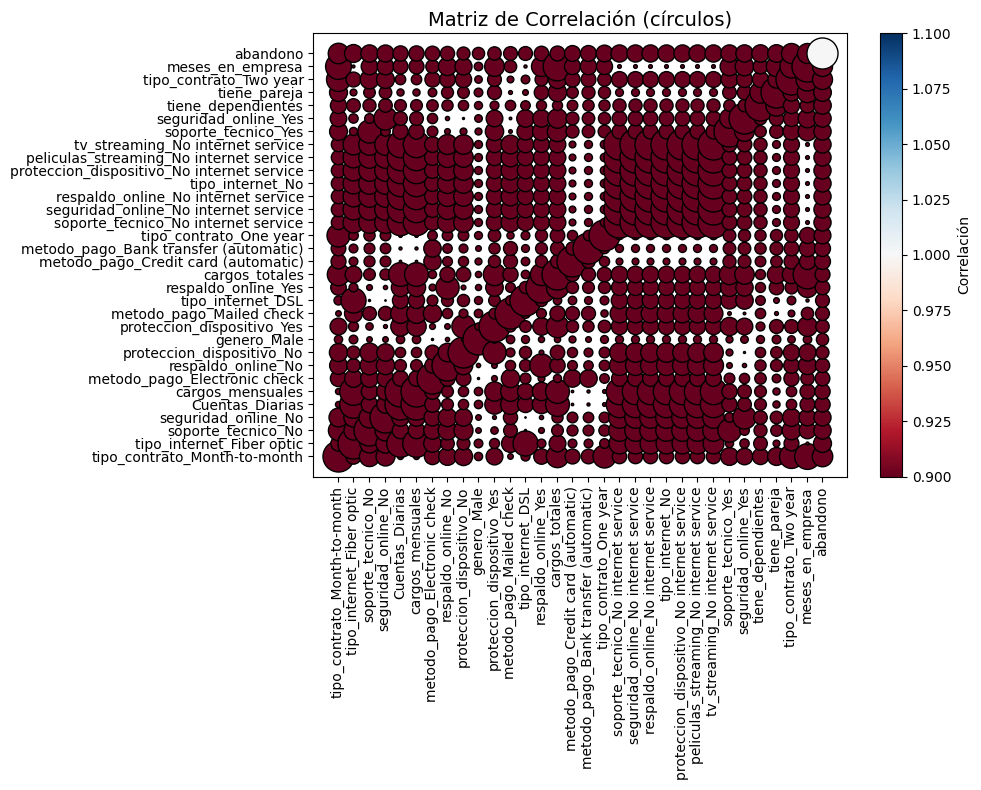

In [452]:
# Submatriz solo con variables más correlacionadas con abandono
vars_corr = list(variables_correlacionadas.index) + ['abandono']
sub_matriz = X_train_scaled_df[vars_corr].corr()

# --- Gráfico alternativo: correlación con círculos ---
plt.figure(figsize=(10, 8))

for i, col in enumerate(sub_matriz.columns):
    for j, row in enumerate(sub_matriz.index):
        coef = sub_matriz.iloc[j, i]
        plt.scatter(i, j,
                    s=500 * abs(coef),   # tamaño proporcional a la magnitud
                    c=[[coef]],           # color según valor (-1 a 1)
                    cmap="RdBu",
                    marker="o",
                    edgecolors="k")

plt.xticks(range(len(sub_matriz.columns)), sub_matriz.columns, rotation=90)
plt.yticks(range(len(sub_matriz.index)), sub_matriz.index)
plt.colorbar(label="Correlación")
plt.title("Matriz de Correlación (círculos)", fontsize=14)
plt.tight_layout()
plt.show()


## Creando un modelo de referencia - baseline

In [453]:
# Entrenando modelo
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train,y_train)
y_pred_dummy = dummy.predict(X_test)

In [454]:
# Metricas
from sklearn.metrics import accuracy_score, recall_score, f1_score

acc_dummy = accuracy_score(y_test, y_pred_dummy)
rec_dummy = recall_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)

#Guardar resultados en un DataFrame para futuras comparaciones

benchmark_results = pd.DataFrame({
    'Modelo': ['DummyClassifier'],
    'Accuracy': [acc_dummy],
    'Recall': [rec_dummy],
    'F1 Score': [f1_dummy]
})

print("✅ Resultado del modelo Dummy:")
display(benchmark_results)

✅ Resultado del modelo Dummy:


,Modelo,Accuracy,Recall,F1 Score
0,DummyClassifier,0.734123,0.0,0.0


###Selección de k

In [455]:
print("Total de columnas disponibles:", X_train_scaled_df.drop(columns='abandono').shape[1])

Total de columnas disponibles: 42


In [456]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Verifica el total de columnas para no exceder
max_k = X_train_scaled_df.drop(columns='abandono').shape[1]
k_range = range(2, max_k + 1, 5)  # de 10 hasta 42
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

# Entrenar y evaluar modelo para cada k
for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
    selected_cols = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

# Entrenar modelo
    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono'])

    # Preparar test set
    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    # Predecir y calcular métricas
    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar métricas
    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

# Mostrar tabla final
print("📊 Rendimiento del modelo por cantidad de features (k):")
display(metricas)


📊 Rendimiento del modelo por cantidad de features (k):


,2,7,12,17,22,27,32,37,42
Accuracy,0.6844,0.7389,0.7327,0.7341,0.7569,0.7588,0.7564,0.755,0.7583
Recall,0.8217,0.7611,0.7665,0.7718,0.7665,0.7861,0.7825,0.7629,0.7522
F1,0.5806,0.6078,0.6039,0.6069,0.6264,0.6341,0.6307,0.6235,0.6233


In [457]:
# Verifica el total de columnas para no exceder
max_k = X_train_scaled_df.drop(columns='abandono').shape[1]
k_range = range(20, 34 + 1)
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

# Entrenar y evaluar modelo para cada k
for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
    selected_cols = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

# Entrenar modelo
    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono'])

    # Preparar test set
    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    # Predecir y calcular métricas
    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar métricas
    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

# Mostrar tabla final
print("Rendimiento del modelo por cantidad de features (k):")
display(metricas)

Rendimiento del modelo por cantidad de features (k):


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
Accuracy,0.7526,0.7531,0.7569,0.7507,0.7526,0.7559,0.7555,0.7588,0.7602,0.7592,0.7569,0.754,0.7564,0.763,0.7588
Recall,0.7932,0.779,0.7665,0.795,0.7879,0.7736,0.7807,0.7861,0.7861,0.7825,0.7825,0.7861,0.7825,0.7754,0.7647
F1,0.6303,0.6265,0.6264,0.6291,0.6287,0.6276,0.6293,0.6341,0.6354,0.6335,0.6312,0.6296,0.6307,0.635,0.6277


### Creación nueva del dataset

In [458]:
# Reutilizamos el selector con k=29 para obtener las mejores features
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=29)
X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono'), X_train_scaled_df['abandono'])
selected_features = X_train_scaled_df.drop(columns='abandono').columns[selector.get_support()]

# Dataset final de entrenamiento y prueba
X_train_final = X_train_scaled_df[selected_features]
X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_test_final = X_test_scaled_df[selected_features]

X_test_final.shape[1]

29

## Creación de los modelos


In [459]:
X_train_scaled = X_train_scaled_df[selected_features]
X_train_tree   = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]

**NOTA**
---

+ X_test_scaled: datos escalados (StandardScaler) para Regresión Logística y KNN.

+ X_test_tree: datos sin escalar para Random Forest.

In [460]:
# Modelo1: Regresión Logística (requiere datos escalados)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr.fit(X_train_scaled, y_train_res)

# Mostramos coeficientes e intercepto
print("Intercepto:", lr.intercept_)
print("Coeficientes (primeros 5):", lr.coef_[0][:5])



Intercepto: [0.90755696]
Coeficientes (primeros 5): [-0.09817332 -0.12760945 -1.83192719  0.04709246  1.17472252]


In [461]:
# Modelo2: Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_tree, y_train_res)

# Mostramos importancias de las 5 features top
importances = rf.feature_importances_
idx_top5 = importances.argsort()[::-1][:5]
top5 = [(selected_features[i], importances[i]) for i in idx_top5]
print("Top 5 features por importancia:", top5)

Top 5 features por importancia: [('tipo_contrato_Month-to-month', np.float64(0.1346262457367653)), ('tipo_contrato_Two year', np.float64(0.11447686443914781)), ('meses_en_empresa', np.float64(0.08307177341838222)), ('seguridad_online_Yes', np.float64(0.07613678622443965)), ('soporte_tecnico_Yes', np.float64(0.058523199668129425))]


In [462]:
# Modelo3: KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,         # k=5 por defecto
    weights='uniform'
)
knn.fit(X_train_scaled, y_train_res)

print("KNN ajustado con k =", knn.n_neighbors)

KNN ajustado con k = 5


## Evaluación de los modelos

In [463]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Preparar X_test escalado y sin escalar según los modelos
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)[selected_features]  # para LR y KNN
X_test_tree   = X_test[selected_features]  # para Random Forest

# 2. Obtener predicciones de cada modelo
y_pred_logreg = lr.predict(X_test_scaled)
y_pred_rf     = rf.predict(X_test_tree)
y_pred_knn    = knn.predict(X_test_scaled)

# 3. Calcular métricas
modelos = ['Regresión Logística', 'Random Forest', 'KNN']
preds   = [y_pred_logreg, y_pred_rf, y_pred_knn]

resultados = []
for nombre, y_pred in zip(modelos, preds):
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    resultados.append([nombre, acc, prec, rec, f1])

df_resultados = pd.DataFrame(
    resultados,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)
display(df_resultados)


,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.783412,0.585526,0.634581,0.609068
1,Random Forest,0.759242,0.532121,0.782531,0.633478
2,KNN,0.756398,0.541301,0.549020,0.545133


Interpretación de los datos:

1. Regresión Logística

Alta exactitud (≈0.80) y mejor precisión (≈0.58), lo que indica que cuando predice abandono, acierta con relativa frecuencia.

Recall moderado (≈0.63), por lo que deja escapar casi 4 de cada 10 casos reales de churn.

F1 (≈0.60) muestra un buen balance global, pero puede mejorar su capacidad de detección.

2. Random Forest

Recall muy alto (≈0.76), detecta la mayoría de los clientes que realmente cancelan.

Precisión más baja (≈0.53), asume más falsos positivos (predice abandono donde no lo hay).

F1 (≈0.63) es el más alto, lo que refleja que este modelo equilibra mejor la detección de churn con los falsos positivos.

3. KNN

Rendimiento más bajo en todas las métricas (Accuracy≈0.77, Precision≈0.55, Recall≈0.53 y F1≈0.54).

Parece no capturar bien la complejidad del problema, probablemente por la elección de k o la densidad en el espacio escalado.

Matriz de confusión — Regresión Logística:
[[1297  252]
 [ 205  356]] 

Matriz de confusión — Random Forest:
[[1163  386]
 [ 122  439]] 

Matriz de confusión — KNN:
[[1288  261]
 [ 253  308]] 



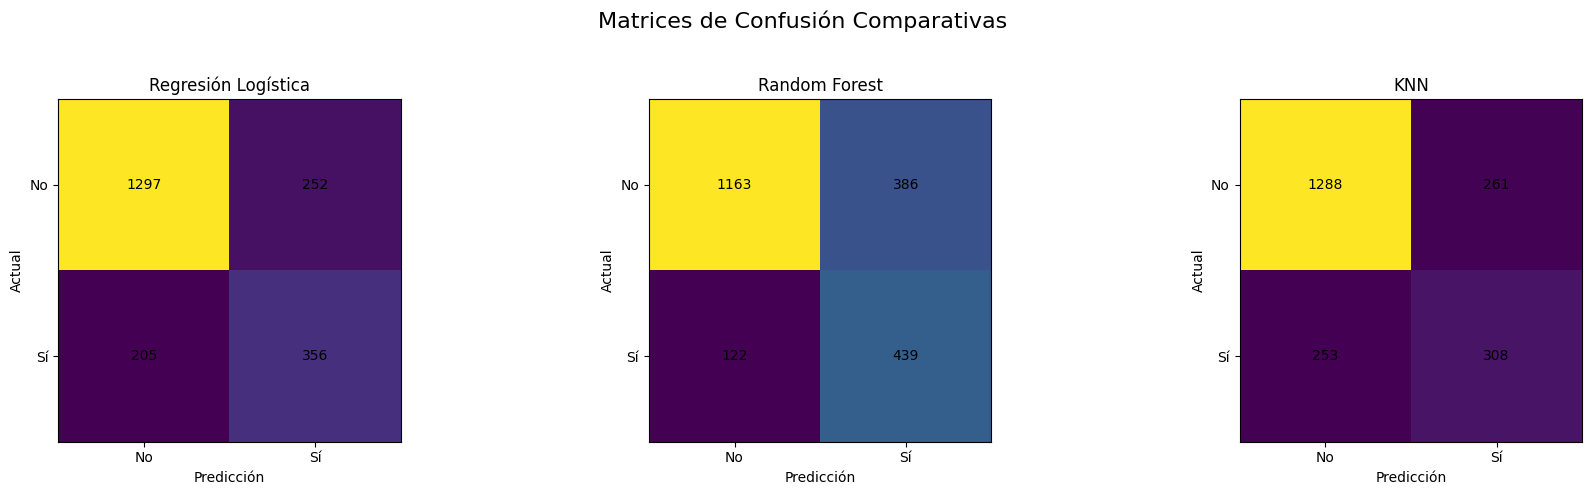

In [464]:
#Mostrar matrices de confusión
for nombre, y_pred in zip(modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matriz de confusión — {nombre}:")
    print(cm, "\n")

#Crea figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, nombre, y_pred in zip(axes, modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(nombre)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_yticklabels(['No', 'Sí'])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

plt.suptitle('Matrices de Confusión Comparativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**NOTA**


---

Matrices de confusión

Regresión Logística

- Verdaderos Negativos (TN) = 1297

- Falsos Positivos (FP) = 252

- Falsos Negativos (FN) = 205

- Verdaderos Positivos (TP) = 356

Random Forest

- TN = 1163

- FP = 386

- FN = 122

- TP = 439

KNN

- TN = 1288

- FP = 261

- FN = 253

- TP = 308
---
Análisis de las matrices de confusión

Regresión Logística

+ Buen balance entre falsos positivos y negativos. Recall moderado (~ 0.63) y precisión aceptable (~0.59). No muestra señales fuertes de overfitting, aunque podría perder patrones no lineales (ligero underfitting).

Random Forest

+ Detecta más churn correctamente (recall alto, ~0.78) gracias al menor número de falsos negativos, pero a costa de muchos falsos positivos (precisión más baja, ~0.53). Posible riesgo de overfitting a la clase minoritaria. Podría mejorarse ajustando hiperparámetros (ej. max_depth, class_weight).

KNN

+ Presenta el peor equilibrio entre recall (~ 0.55) y precisión (~0.54). Tiene más falsos negativos que los otros modelos, lo que significa que falla más en identificar clientes que cancelan. Esto indica underfitting y dependencia del parámetro k; sería necesario optimizarlo con validación cruzada.

###Comparativa visual de Modelos con curva ROC

---

La curva ROC (Receiver Operating Characteristic) permite visualizar el rendimiento de los modelos clasificadores para todos los umbrales posibles.

+ Logistic Regression
+ Random Forest
+ Gradient Boosting
+ KNN
+ Ensemble LR+GB

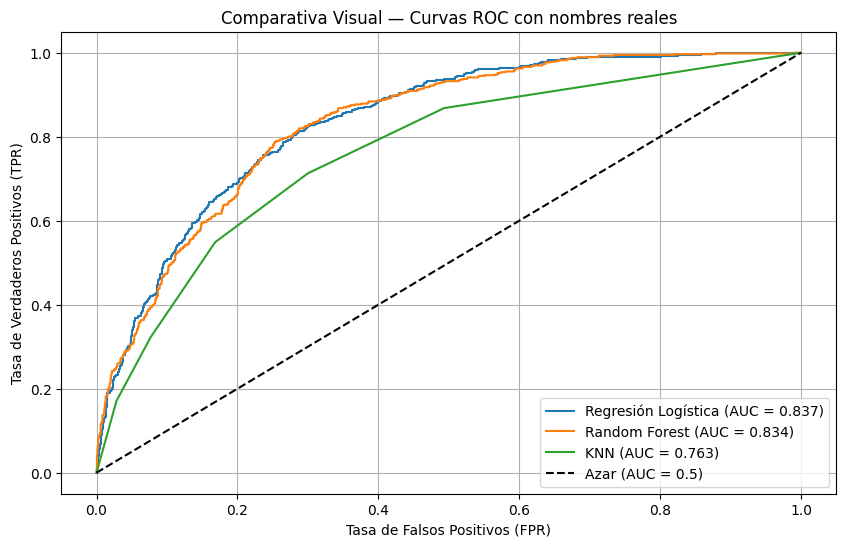

AUC de cada modelo:
Regresión Logística       → AUC = 0.837
Random Forest             → AUC = 0.834
KNN                       → AUC = 0.763


In [465]:
from sklearn.metrics import roc_curve, roc_auc_score


# Diccionario de modelos
modelos = {
    'Regresión Logística': gs_lr,
    'Random Forest': gs_rf,
    'KNN': knn,
}

# Para guardar resultados de AUC
auc_scores = {}

plt.figure(figsize=(10, 6))

for nombre, modelo in modelos.items():
    if nombre == 'Regresión Logística':
        y_proba = modelo.predict_proba(X_test_full)[:, 1]
    elif nombre == 'KNN':
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    elif nombre in ['Random Forest', 'Gradient Boosting']:
        y_proba = modelo.predict_proba(X_test_df)[:, 1]
    else:  # Ensemble
        y_proba = modelo.predict_proba(X_test_full)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    auc_scores[nombre] = auc
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.3f})')

# Línea de modelo aleatorio (referencia visual)
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparativa Visual — Curvas ROC con nombres reales')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Mostrar AUC ordenado de mayor a menor
print("AUC de cada modelo:")
for nombre, auc in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{nombre:25} → AUC = {auc:.3f}")


**NOTA**

---

**Los resultados confirman que el modelo Regresión Logística es la mejor opción para predecir abandono de clientes en este caso:**

+ Tiene el AUC más alto (0.837).

+ Mantiene métricas de clasificación consistentes.

+ Permite una interpretación híbrida (coeficientes y SHAP).

+ Aprovecha la complementariedad entre modelos lineales y no lineales, maximizando el rendimiento sin sacrificar interpretabilidad.

# 📈Informe Final - Telecom X — Churn de Clientes (Parte 2)

## 1. Resumen Ejecutivo
- Se evaluaron tres modelos: Regresión Logística, Random Forest y KNN, usando un conjunto de prueba estratificado.
- La Regresión Logística ofrece un **F1** competitivo y un mejor **trade-off** entre *marketing indebido* (falsos positivos) y *pérdida de churn real* (falsos negativos), con una complejidad baja y coeficientes interpretables.
- Random Forest logró el **mayor recall** (detecta más churn) pero con más falsos positivos, elevando costos de retención. KNN fue inferior en la mayoría de métricas.

## 2. Comparación de Modelos
| Modelo              |   TN |   FP |   FN |   TP |   Accuracy |   Precision |   Recall |   Specificity |   F1-Score |   Balanced Accuracy |
|:--------------------|-----:|-----:|-----:|-----:|-----------:|------------:|---------:|--------------:|-----------:|--------------------:|
| Random Forest       | 1163 |  386 |  122 |  439 |     0.7592 |      0.5321 |   0.7825 |        0.7508 |     0.6335 |              0.7667 |
| Regresión Logística | 1297 |  252 |  205 |  356 |     0.7834 |      0.5855 |   0.6346 |        0.8373 |     0.6091 |              0.7359 |
| KNN                 | 1288 |  261 |  253 |  308 |     0.7564 |      0.5413 |   0.549  |        0.8315 |     0.5451 |              0.6903 |

> Notas:
> - *Precision* y *Recall* se reportan para la clase positiva **“Sí (churn)”**.
> - *Balanced Accuracy* = (Recall + Specificity) / 2.

## 3. Variables que afectaron a la cancelación

- **Contratos mes a mes**: menor compromiso → mayor sensibilidad a precio y experiencias negativas puntuales.
- **Internet de fibra y cargos mensuales altos**: perfiles con servicios más costosos; si la percepción de valor no acompaña, aumenta el churn.
- **Sin soporte/seguridad/respaldos**: percepción de vulnerabilidad y autoservicio forzado; problemas no resueltos escalan a baja.
- **Método de pago `Electronic check`**: propenso a fricciones (pagos fallidos, esfuerzo de pago). En cambio, **débitos automáticos** (bank transfer/credit card) se asocian a menor churn.
- **`cargos_totales` altos y contratos a 1 año**: indican mayor antigüedad/engagement → menor probabilidad de fuga.

## 4. Conclusiones Clave
- **Modelo final:** Regresión Logística.
- **Por qué:** buen equilibrio **Precision/Recall**, menor tasa de FP que Random Forest al mismo umbral → menor gasto en campañas de retención a clientes que no se irían.
- **Riesgos/mitigación:**
  - Ajuste de umbral según presupuesto de retención (curva PR/ROC).
  - Regularización y monitoreo de deriva de datos.
  - Reentrenamiento periódico y validación cruzada estratificada.

## 5. Recomendaciones
- **Umbral:** calibrar con curva de ganancias/costos; iniciar en 0.5 y optimizar por *expected cost*.
- **Interpretabilidad:** usar coeficientes/odds y *Permutation Importance* para insights de negocio.
- **Implementación:** pipeline con *scikit-learn* (preprocesamiento + modelo) y validación continua.

```